--- | ---
--- | ---
Name: | **Leopando, Lara Jeneane D.G.**<br>
Course and Section: | **CPE 019 - CPE32S3**<br>
Date of Submission: | **04-19-2024**<br>
Instructor: | **Engr. Roman Richard**<br>
<hr> | <hr>

### Assignment 8.1 : Saving Models

##**Instructions:**<br>

1. Choose any dataset applicable to either a classification problem or a regression problem.
2. Explain your datasets and the problem being addressed.
3. Show evidence that you can do the following:
  - Save a model in HDF5 format
  - Save a model and load the model in a JSON format
  - Save a model and load the model in a YAML format
  - Checkpoint Neural Network Model Improvements
  - Checkpoint Best Neural Network Model only
  - Load a saved Neural Network model
  - Visualize Model Training History in Keras
  - Show the application of Dropout Regularization
  - Show the application of Dropout on the visible layer
  - Show the application of Dropout on the hidden layer
  - Show the application of a time-based learning rate schedule
  - Show the application of a drop-based learning rate schedule
4. Submit the link to your Google Colab (make sure that it is accessible to me)


# 1. Choose any dataset applicable to either a classification problem or a regression problem.

Dataset link: https://archive.ics.uci.edu/dataset/850/raisin



In [3]:
pip install ucimlrepo

In [10]:
from ucimlrepo import fetch_ucirepo
import numpy as np

# fetch dataset
raisin = fetch_ucirepo(id=850)

# data (as pandas dataframes)
X = raisin.data.features
Y = raisin.data.targets

# Convert Y to a numpy array
Y_array = Y.to_numpy()

# Combine features and targets
raisin_data = np.hstack((X, Y_array.reshape(-1, 1)))

# Verify the shape of the combined dataset
print("Combined dataset shape:", raisin_data.shape)

# metadata
print(raisin.metadata)

# variable information
print(raisin.variables)

Combined dataset shape: (900, 8)
{'uci_id': 850, 'name': 'Raisin', 'repository_url': 'https://archive.ics.uci.edu/dataset/850/raisin', 'data_url': 'https://archive.ics.uci.edu/static/public/850/data.csv', 'abstract': 'Images of the Kecimen and Besni raisin varieties were obtained with CVS. A total of 900 raisins were used, including 450 from both varieties, and 7 morphological features were extracted.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 900, 'num_features': 7, 'feature_types': ['Real', 'Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5660T', 'creators': ['İ̇lkay Çinar', 'Murat Koklu', 'Sakir Tasdemir'], 'intro_paper': {'title': 'Kuru Üzüm Tanelerinin Makine Görüşü ve Yapay Zeka Yöntemleri Kullanılarak Sınıflandırılması', 'authors': 'İ̇lkay Ç

In [20]:
pip install tensorflow==2.12.0

  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires keras>=3.2.0, but you have keras 2.12.0 which is incompatible.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.12.0 which is incompatible.


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt

In [5]:
# Combine features and targets
raisin_data = pd.concat([X, Y], axis=1)

# Display the combined dataset as a table
print(raisin_data)

      Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter    Class  
0    0.758651   1184.040  Kecimen  
1    0.684130   1121.786  Kecimen  
2  

In [6]:
X.describe()


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [7]:
Y.describe()

,Class
count,900
unique,2
top,Kecimen
freq,450


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.3 KB


In [9]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   900 non-null    object
dtypes: object(1)
memory usage: 7.2+ KB


In [5]:
X.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [10]:
Y.head()

,Class
0,Kecimen
1,Kecimen
2,Kecimen
3,Kecimen
4,Kecimen


In [11]:
X.tail()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548
899,85609,512.081774,215.271976,0.907345,89197,0.632020,1272.862


In [12]:
Y.tail()

,Class
895,Besni
896,Besni
897,Besni
898,Besni
899,Besni


In [13]:
X.isna().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
dtype: int64

In [14]:
Y.isna().sum()

Class    0
dtype: int64

In [15]:
raisin_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


# 2. Explain your datasets and the problem being addressed.


**The Raisin Dataset**
- In this dataset, a total of 900 raisin grains were used, including 450 pieces from both varieties. Images of Kecimen and Besni raisin varieties grown in Turkey were obtained, werein are subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been said to be classified using three different artificial intelligence techniques.

**FEATURES ARE:**
Area               
MajorAxisLength    
MinorAxisLength    
Eccentricity      
ConvexArea         
Extent             
Perimeter      

**TARGET:**
Class    

# 3. Show evidence that you can do the following:


In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [17]:
!pip install np_utils

In [18]:
# Check for any non-numeric columns
non_numeric_columns = raisin_data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop non-numeric columns
raisin_data_numeric = raisin_data.drop(columns=non_numeric_columns)

Non-numeric columns: Index(['Class'], dtype='object')


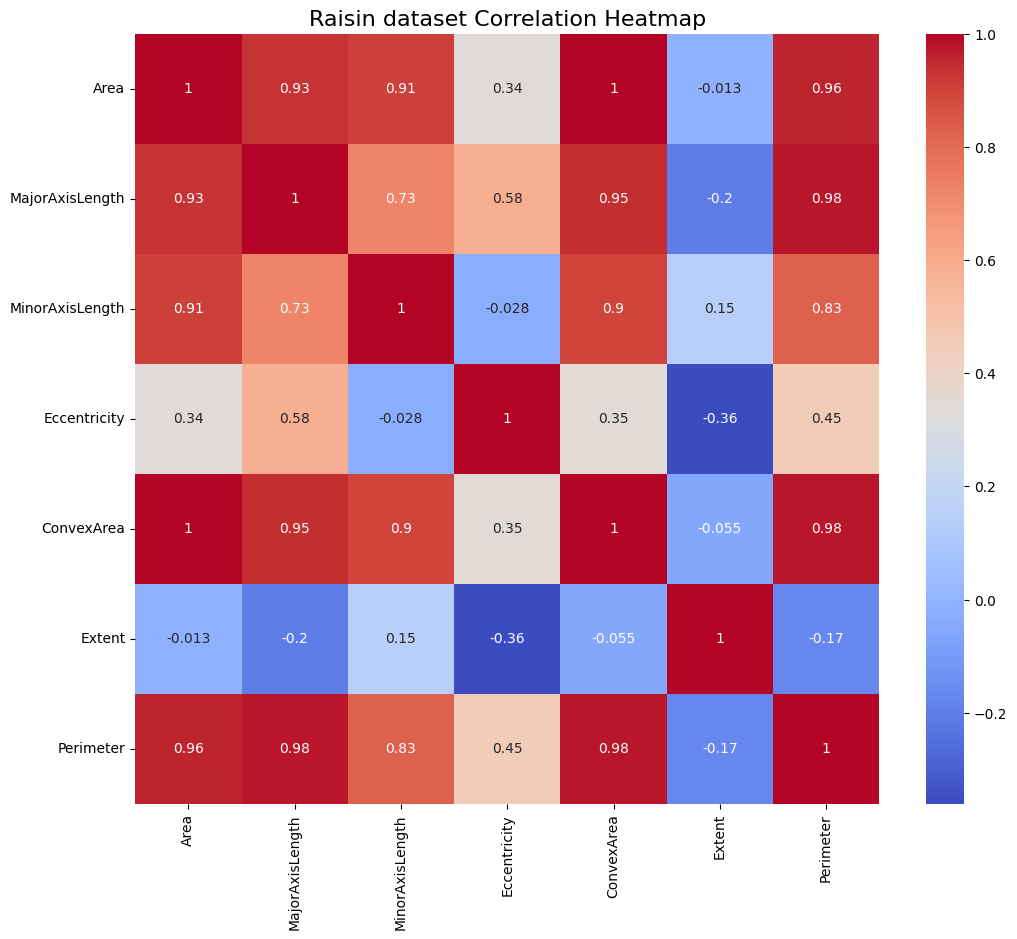

In [19]:
# Correlation Analysis

# using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(raisin_data_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Raisin dataset Correlation Heatmap", fontsize=16)
plt.show()

In [20]:
# fix random seed for reproducibility
np.random.seed(7)

# fetch dataset
raisin = fetch_ucirepo(id=850)

# data (as pandas dataframes)
X = raisin.data.features
Y = raisin.data.targets

# Preprocess data (scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((720, 7), (180, 7), (720, 1), (180, 1))

In [21]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

utils_le = LabelEncoder()
utils_le.fit(y_train)
y_utils_le = utils_le.transform(y_train)
encoded_y = to_categorical(y_utils_le)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [22]:
num_classes = len(np.unique(Y))

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# One-hot encode target labels
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

model = Sequential()
model.add(Input(shape=(7,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [24]:
# Fit the model
model.fit(X_train, encoded_y, epochs=100, batch_size=32, verbose=0)

# evaluate
scores = model.evaluate(X_train, encoded_y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 87.50%


## 3.1 Save a model in HDF5 format


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
pip install h5py

In [27]:
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/Colab Notebooks/model.h5")
print("Saved model to disk")

Saved model to disk


## 3.2 Save a model and load the model in a JSON format


In [28]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
import numpy
import os

In [29]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [30]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

model.save_weights("/content/drive/MyDrive/Colab Notebooks/model.h5")
print("Saved model to disk")

Saved model to disk


In [31]:
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Colab Notebooks/model.h5")
print("Loaded model from disk")

Loaded model from disk


In [32]:
# evaluate loaded model
loaded_model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
score = loaded_model.evaluate(X_train, encoded_y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 87.50%


## 3.3 Save a model and load the model in a YAML format


In [33]:
# serialize model to YAML
model_yaml = model.to_json()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/Colab Notebooks/model_yaml.h5")
print("Saved model to disk")

Saved model to disk


In [34]:
# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_json(loaded_model_yaml)

In [35]:
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Colab Notebooks/model_yaml.h5")
print("Loaded model from disk")

Loaded model from disk


In [36]:
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
result = loaded_model.evaluate(X_train, encoded_y, verbose = 0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], result[1]*100))

accuracy: 87.50%


## 3.4 Checkpoint Neural Network Model Improvements


In [37]:
# Checkpoint the weights when validation accuracy improves
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

seed = 42
tf.random.set_seed(seed)

In [38]:
from keras.optimizers import SGD

# Define the learning rate
learning_rate = 0.01

# Create SGD optimizer with the specified learning rate
optimizer = SGD(learning_rate=learning_rate)

# Compile the model with the SGD optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [40]:
import pandas as pd

# Perform one-hot encoding using get_dummies
Y_one_hot = pd.get_dummies(Y)

In [41]:
# Fit the model
model.fit(X, Y_one_hot, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to weights-improvement-01-0.00.hdf5

Epoch 2: val_accuracy did not improve from 0.00000

Epoch 3: val_accuracy did not improve from 0.00000

Epoch 4: val_accuracy did not improve from 0.00000

Epoch 5: val_accuracy did not improve from 0.00000

Epoch 6: val_accuracy did not improve from 0.00000

Epoch 7: val_accuracy did not improve from 0.00000

Epoch 8: val_accuracy did not improve from 0.00000

Epoch 9: val_accuracy did not improve from 0.00000

Epoch 10: val_accuracy did not improve from 0.00000

Epoch 11: val_accuracy did not improve from 0.00000

Epoch 12: val_accuracy did not improve from 0.00000

Epoch 13: val_accuracy did not improve from 0.00000

Epoch 14: val_accuracy did not improve from 0.00000

Epoch 15: val_accuracy did not improve from 0.00000

Epoch 16: val_accuracy did not improve from 0.00000

Epoch 17: val_accuracy did not improve from 0.00000

Epoch 18: val_accuracy did not improve from 0.00000

Epo

## 3.5 Checkpoint Best Neural Network Model only


In [42]:
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [43]:
# Fit the model
model.fit(X, Y_one_hot, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to weights.best.hdf5

Epoch 2: val_accuracy did not improve from 0.00000

Epoch 3: val_accuracy did not improve from 0.00000

Epoch 4: val_accuracy did not improve from 0.00000

Epoch 5: val_accuracy did not improve from 0.00000

Epoch 6: val_accuracy did not improve from 0.00000

Epoch 7: val_accuracy did not improve from 0.00000

Epoch 8: val_accuracy did not improve from 0.00000

Epoch 9: val_accuracy did not improve from 0.00000

Epoch 10: val_accuracy did not improve from 0.00000

Epoch 11: val_accuracy did not improve from 0.00000

Epoch 12: val_accuracy did not improve from 0.00000

Epoch 13: val_accuracy did not improve from 0.00000

Epoch 14: val_accuracy did not improve from 0.00000

Epoch 15: val_accuracy did not improve from 0.00000

Epoch 16: val_accuracy did not improve from 0.00000

Epoch 17: val_accuracy did not improve from 0.00000

Epoch 18: val_accuracy did not improve from 0.00000

Epoch 19: val_accu

## 3.6 Load a saved Neural Network model


In [44]:
# load weights
model.load_weights("weights.best.hdf5")

In [45]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
print("Created model and loaded weights from file")

Created model and loaded weights from file


In [46]:
# estimate accuracy on whole dataset using loaded weights
result = loaded_model.evaluate(X_train, encoded_y, verbose = 0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], result[1]*100))

accuracy: 87.50%


## 3.7 Visualize Model Training History in Keras


In [47]:
# Compile model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X, Y_one_hot, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy did not improve from 0.00000

Epoch 2: val_accuracy did not improve from 0.00000

Epoch 3: val_accuracy did not improve from 0.00000

Epoch 4: val_accuracy did not improve from 0.00000

Epoch 5: val_accuracy did not improve from 0.00000

Epoch 6: val_accuracy did not improve from 0.00000

Epoch 7: val_accuracy did not improve from 0.00000

Epoch 8: val_accuracy did not improve from 0.00000

Epoch 9: val_accuracy did not improve from 0.00000

Epoch 10: val_accuracy did not improve from 0.00000

Epoch 11: val_accuracy did not improve from 0.00000

Epoch 12: val_accuracy did not improve from 0.00000

Epoch 13: val_accuracy did not improve from 0.00000

Epoch 14: val_accuracy did not improve from 0.00000

Epoch 15: val_accuracy did not improve from 0.00000

Epoch 16: val_accuracy did not improve from 0.00000

Epoch 17: val_accuracy did not improve from 0.00000

Epoch 18: val_accuracy did not improve from 0.00000

Epoch 19: val_accuracy did not improve from 0.00000

E

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


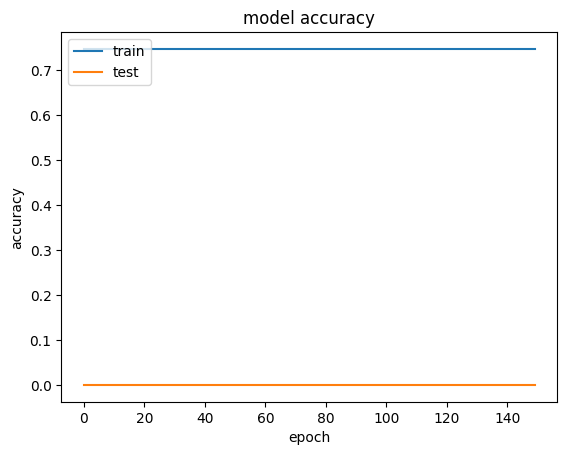

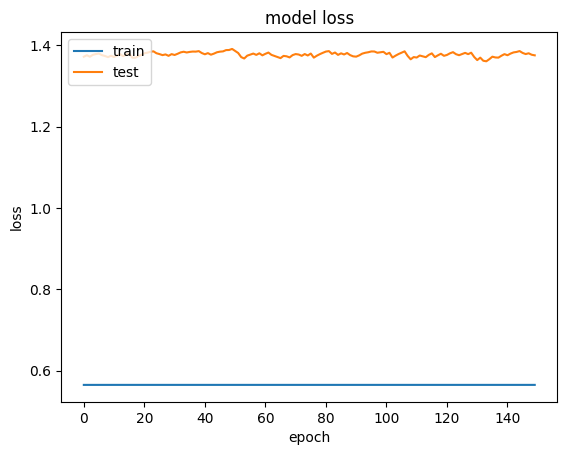

In [49]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 3.8 Show the application of Dropout Regularization


In [51]:
!pip install scikeras

  Using cached keras-3.2.1-py3-none-any.whl (1.1 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 3.2.1 which is incompatible.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.12.0 which is incompatible.


In [3]:
pip install tensorflow scikeras

  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
INFO: pip is looking at multiple versions of scikeras to determine which version is compatible with other requirements. This could take a while.
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1
  Attempting uninstall: scikeras
    Found existing installation: scikeras 0.13.0
    Uninstalling scikeras-0.13.0:
      Successfully uninstalled scikeras-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.12.0 which is incompatible.


In [6]:
pip install ucimlrepo

In [ ]:
# Baseline Model on the Sonar Dataset
import tensorflow as tf
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# fetch dataset
raisin = fetch_ucirepo(id=850)

# data (as pandas dataframes)
X = raisin.data.features
Y = raisin.data.targets

# Preprocess data (scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# baseline
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(60, input_shape=(60,), activation='relu'))
	model.add(Dense(30,  activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.01, momentum=0.8)
	compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_baseline, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X_train , encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

## 3.9 Show the application of Dropout on the visible layer


In [21]:
# dropout in the input layer with weight constraint
def create_model():
	# create model
	model = Sequential()
	model.add(Dropout(0.2, input_shape=(60,)))
	model.add(Dense(60, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.1, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Visible: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 915, in _fit
    X, y = self._initialize(X, y)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 852, in _initialize
    self.model_ = self._build_keras_model()
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 429, in _build_keras_model
    model = final_build_fn(**build_params)
  File "<ipython-input-21-307c96eda713>", line 5, in create_model
    model.add(Dropout(0.2, input_shape=(60,)))
NameError: name 'Dropout' is not defined


## 3.10 Show the application of Dropout on the hidden layer


In [20]:
# dropout in hidden layers with weight constraint
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(60, input_shape=(60,), activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dropout(0.2))
	model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dropout(0.2))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.1, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X_train, encoded_Y, cv=kfold)
print("Hidden: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

ValueError: Found input variables with inconsistent numbers of samples: [720, 900]

## 3.11 Show the application of a time-based learning rate schedule


In [35]:
# fetch dataset
raisin = fetch_ucirepo(id=850)

# data (as pandas dataframes)
X = raisin.data.features
Y = raisin.data.targets

# Preprocess data (scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# create model
model = Sequential()
model.add(Dense(34, input_shape=(34,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [36]:
from keras.callbacks import LearningRateScheduler

# Define the learning rate schedule function
def learning_rate_schedule(epoch, learning_rate):
    decay_rate = learning_rate / epochs
    return learning_rate - decay_rate * epoch

# Compile model
epochs = 50
learning_rate = 0.1
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum, nesterov=False)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Define learning rate scheduler callback
lr_scheduler = LearningRateScheduler(learning_rate_schedule)

# Fit the model with the learning rate scheduler callback
model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2, callbacks=[lr_scheduler])


Epoch 1/50


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_71" is incompatible with the layer: expected shape=(None, 34), found shape=(None, 7)


## 3.12 Show the application of a drop-based learning rate schedule

# Conclusion

- This activity was quite confusing, and would really take time to analyze and do correctly. Building the model and using the correct technique is trully a crucial part of the process. Having to build, train, and test incorrectly may result to a longer process, and an unconsistent result. Moreover, it is important to make sure that we pre-process correctly, and nothing gets left out, for us to be able to build a successfull model, and be able to analyze and evaluate it. Overall, this activity helped me to further explore saving models in such formats, as well as the checkpoint and visualization. Saving the model in the given format was quite easy, but being able to apply it had me troubled.